In [1]:
# importing the dependcies 

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
# Loading the data from csv file to pandas 
car_dataset = pd.read_csv('car data.csv')
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car_dataset.shape

(301, 9)

In [4]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
# Checking the numbe of missing values 

car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
# Checking the distribution of catgeorical data 

print(car_dataset.Fuel_Type.value_counts()) 
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [7]:
le = LabelEncoder()
car_dataset.Fuel_Type =  le.fit_transform(car_dataset.Fuel_Type)
car_dataset.Seller_Type =  le.fit_transform(car_dataset.Seller_Type)
car_dataset.Transmission =  le.fit_transform(car_dataset.Transmission)

In [8]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [9]:
X = car_dataset.drop(['Selling_Price', 'Car_Name'], axis=1)
Y = car_dataset['Selling_Price']


In [10]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          2            0             1   
1    2013           9.54       43000          1            0             1   
2    2017           9.85        6900          2            0             1   
3    2011           4.15        5200          2            0             1   
4    2014           6.87       42450          1            0             1   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             1   
297  2015           5.90       60000          2            0             1   
298  2009          11.00       87934          2            0             1   
299  2017          12.50        9000          1            0             1   
300  2016           5.90        5464          2            0             1   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [12]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)


LinearRegression()

In [17]:
training_data_prediction = lin_reg_model.predict(X_train)

In [19]:
error_score = metrics.r2_score(y_train, training_data_prediction) 
print(error_score)

0.8365766715026842


In [21]:
test_data_prediction  = lin_reg_model.predict(X_test)


In [23]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print(error_score)

0.8365766715026842


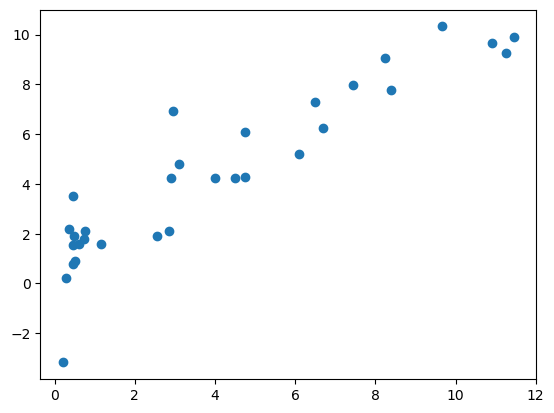

In [24]:
plt.scatter(y_test, test_data_prediction)

In [25]:
lasso_reg_model = Lasso()
lasso_reg_model.fit(X_train, y_train)



Lasso()

In [26]:
y_predict = lasso_reg_model.predict(X_test)


In [28]:
# R-score 
error_score = metrics.r2_score(y_test, y_predict)
print(error_score)

0.8709167941173195
